<a href="https://colab.research.google.com/github/brookejoseph/dpcoco/blob/main/coco%2Bguassian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

if "google.colab" in sys.modules:

    def download_from_web(url):
        import requests

        response = requests.get(url)
        if response.status_code == 200:
            with open(url.split("/")[-1], "wb") as file:
                file.write(response.content)
        else:
            raise Exception(
                f"Failed to download the image. Status code: {response.status_code}"
            )

    download_from_web(
        "https://github.com/YoniChechik/AI_is_Math/raw/master/c_02b_filtering_and_resampling/Tour_Eiffel.jpg"
    )

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

figsize = (10, 10)

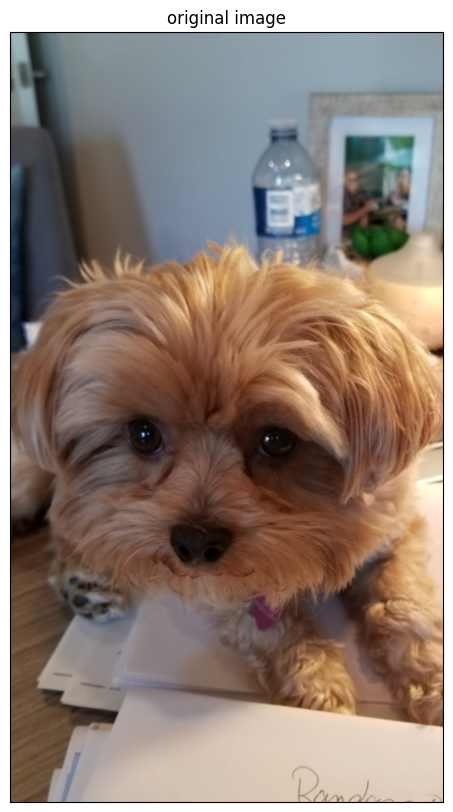

In [ ]:
def plot_im(img, title):
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()


img = cv2.imread("/content/Untitled design.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_im(img, "original image")



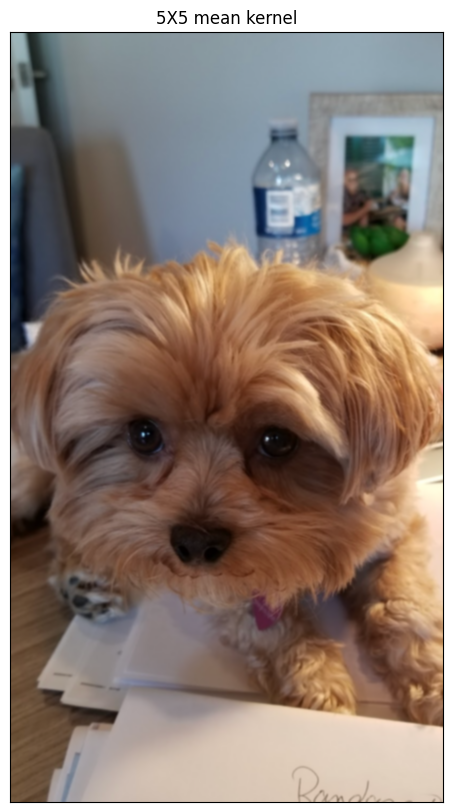

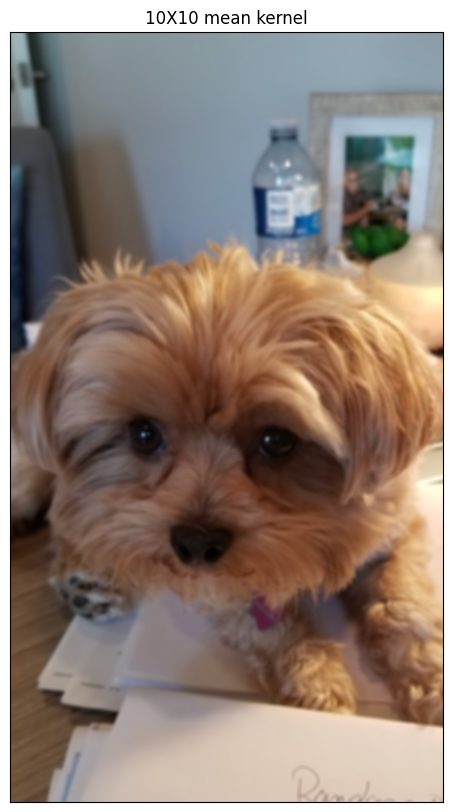

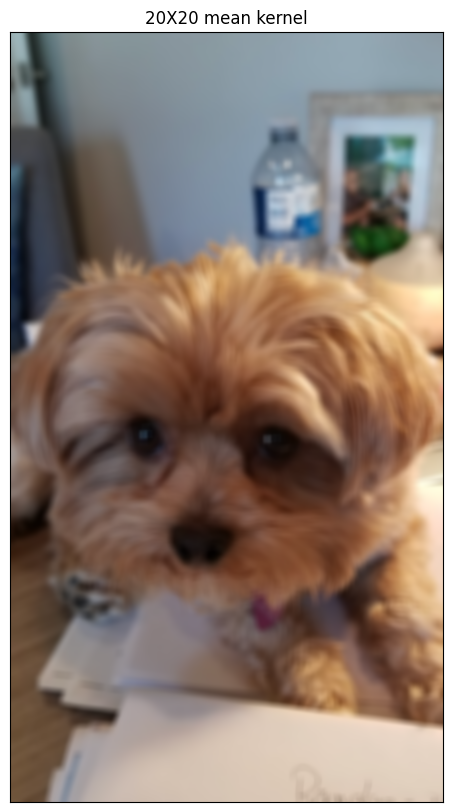

In [ ]:
def mean_kernel_smoothing(img, sz):
    kernel = np.ones((sz, sz)) / (sz**2)
    dst = cv2.filter2D(img, -1, kernel)

    plot_im(dst, str(sz) + "X" + str(sz) + " mean kernel")


mean_kernel_smoothing(img, 5)
mean_kernel_smoothing(img, 10)
mean_kernel_smoothing(img, 20)

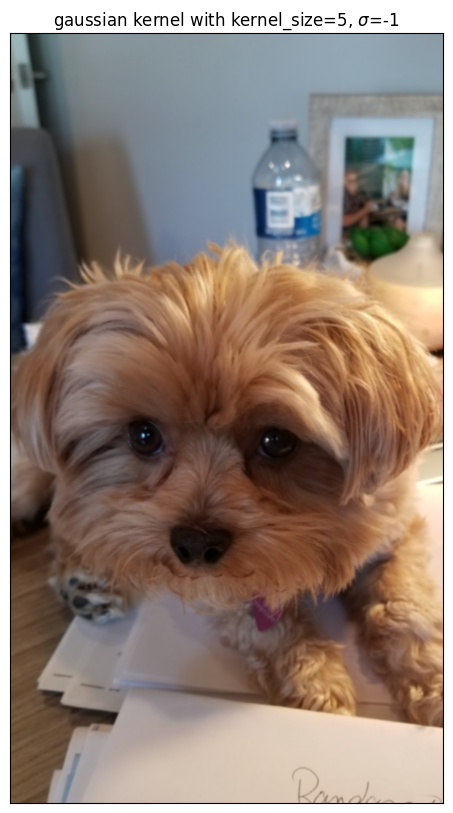

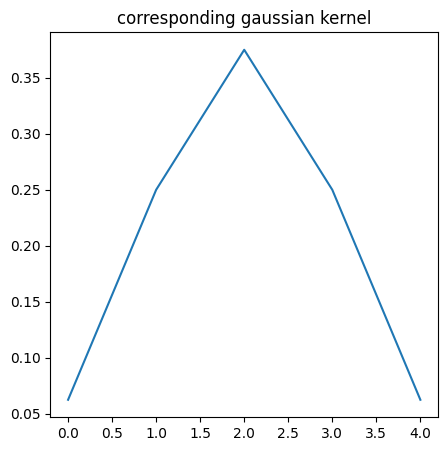

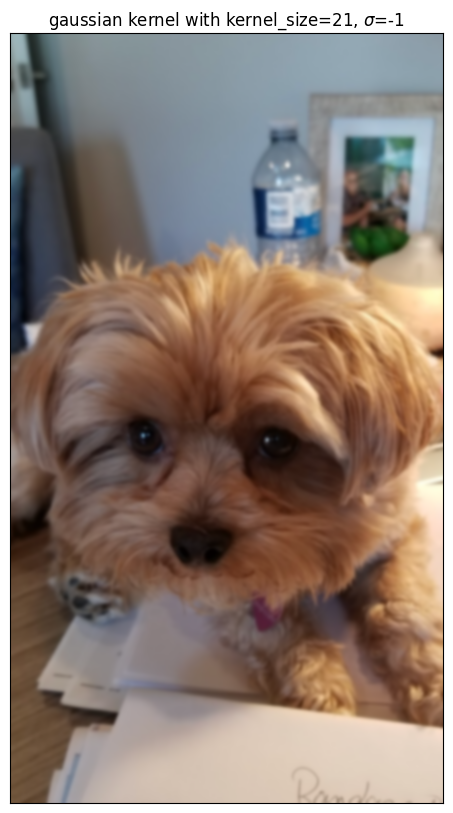

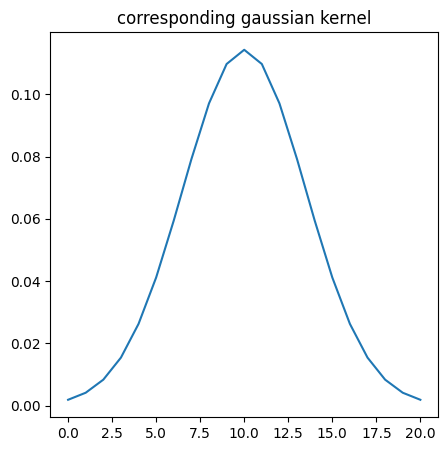

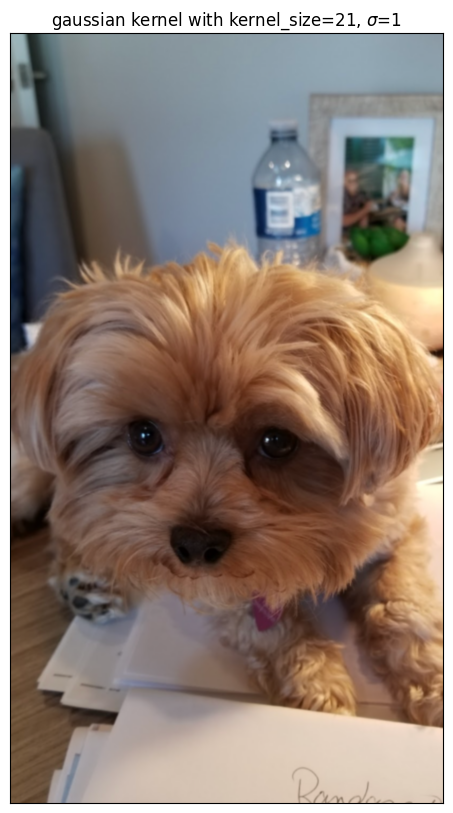

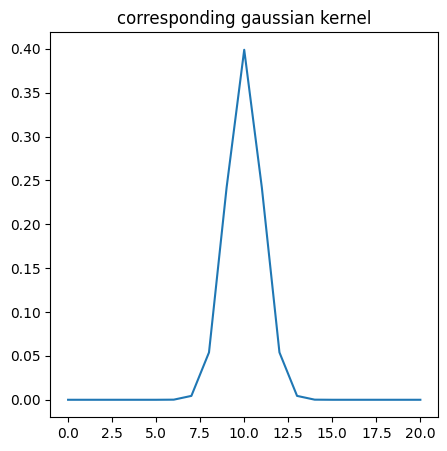

In [ ]:
def gauss_blur(img, k_sz, sigma=-1, is_plot_kernel=False):
    blur = cv2.GaussianBlur(img, (k_sz, k_sz), sigma)
    plot_im(
        blur,
        "gaussian kernel with kernel_size=" + str(k_sz) + r", $\sigma$=" + str(sigma),
    )
    if is_plot_kernel:
        # sigma=-1 will set the sigma size automatically
        gauss_ker = cv2.getGaussianKernel(k_sz, sigma)
        plt.figure(figsize=(figsize[0] / 2, figsize[1] / 2))
        plt.plot(gauss_ker)
        plt.title("corresponding gaussian kernel")
        plt.show()


gauss_blur(img, 5, is_plot_kernel=True)
gauss_blur(img, 21, is_plot_kernel=True)
gauss_blur(img, 21, 1, is_plot_kernel=True)
